In [1]:
import myutils as my
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
df = pd.DataFrame(pd.read_csv("./data/minimal.50d.3f.csv")).set_index("0")

In [3]:
pca = PCA(n_components = 2)

In [5]:
nums = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "14", "-10", "0", "40", "150", "10000", "zero", "one", "two", "three", "five", "forty", "fourteen", "hundred", "million", "thousand"]


In [7]:
pca.fit(df.loc[nums])

PCA(copy=True, n_components=2, whiten=False)

In [17]:
nums_plot = pd.DataFrame(pca.transform(df.loc[nums])).rename(columns={0:"x", 1:"y"})
nums_plot["name"] = nums
nums_plot


,x,y,name
0,-2.469723,0.003751,1
1,-2.339144,-0.085222,2
2,-2.260201,-0.041331,3
3,-2.058571,-0.065856,4
4,-1.747150,-0.174103,5
5,-1.881746,-0.011134,6
6,-1.862818,-0.007347,7
7,-1.742239,-0.025729,8
8,-1.586388,0.077795,9
9,-0.580895,-0.950115,10


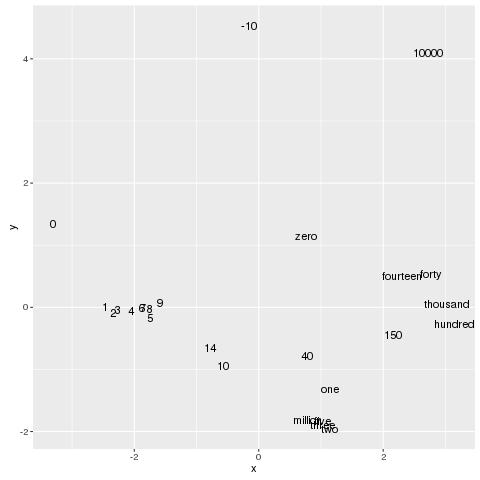

In [18]:
%%R -i nums_plot
library(ggplot2)

ggplot(nums_plot, aes(x, y, label=name)) +
  geom_text()